In [2]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.1 MB/s eta 0:00:00


2025-10-01 06:53:34.089 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 06:53:34.197 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 06:53:34.198 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 06:53:34.199 No runtime found, using MemoryCacheStorageManager
2025-10-01 06:53:34.201 No runtime found, using MemoryCacheStorageManager
2025-10-01 06:53:34.202 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 06:53:34.203 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 06:53:34.204 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 06:53:34.204 Thread 'MainThread': missing ScriptRunContext! This warning can be ignor

DeltaGenerator()

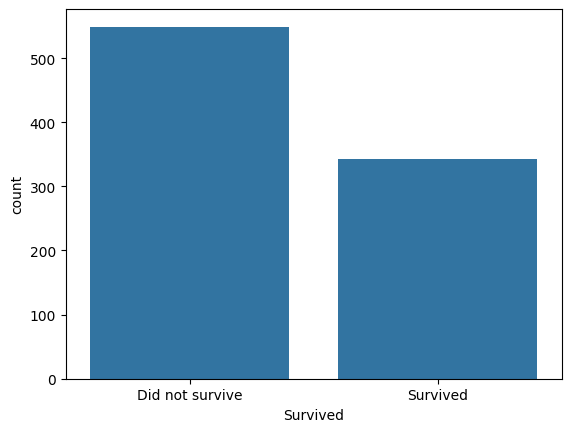

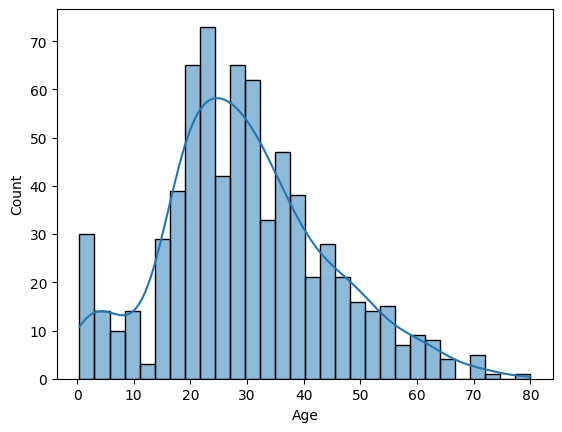

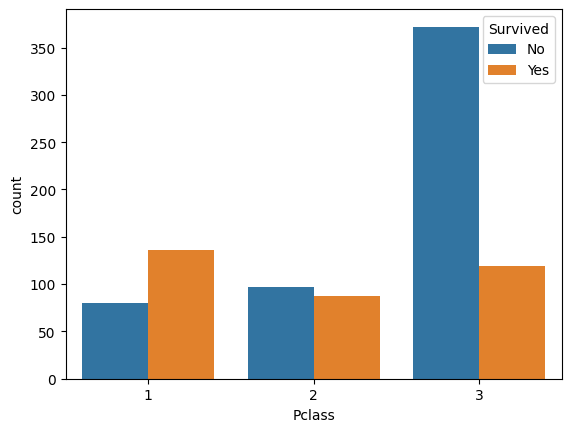

In [4]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

st.title("Titanic Dataset Data Analysis")

@st.cache_data
def load_data():
    data = pd.read_csv('/content/sample_data/titanic.csv')
    return data

df = load_data()

st.sidebar.header("Filter & Customize")

pclass_filter = st.sidebar.multiselect(
    "Select Passenger Class(es):",
    options=sorted(df["Pclass"].unique()),
    default=sorted(df["Pclass"].unique())
)
filtered_df = df[df["Pclass"].isin(pclass_filter)]

survival_filter = st.sidebar.multiselect(
    "Select Survival Status:",
    options=[0, 1],
    format_func=lambda x: "Survived" if x == 1 else "Did not survive",
    default=[0, 1]
)
filtered_df = filtered_df[filtered_df["Survived"].isin(survival_filter)]

numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns.to_list()
hist_col = st.sidebar.selectbox("Select column for histogram:", numerical_columns, index=numerical_columns.index("Age"))

if st.sidebar.checkbox("Show Filtered Data Preview", value=True):
    st.subheader("Filtered Data Preview")
    st.write(filtered_df.head())
else:
    st.subheader("Data Preview")
    st.write(df.head())

if st.sidebar.checkbox("Show Data Summary Statistics", value=True):
    st.subheader("Summary Statistics")
    st.write(filtered_df.describe())

st.subheader("Survival Count")
fig1, ax1 = plt.subplots()
sns.countplot(x="Survived", data=filtered_df, ax=ax1)
ax1.set_xticklabels(["Did not survive", "Survived"])
st.pyplot(fig1)

st.subheader(f"{hist_col} Distribution")
show_kde = st.checkbox("Show KDE plot", value=True)
fig2, ax2 = plt.subplots()
sns.histplot(filtered_df[hist_col].dropna(), kde=show_kde, bins=30, ax=ax2)
st.pyplot(fig2)

st.subheader("Survival by Passenger Class")
fig3, ax3 = plt.subplots()
sns.countplot(x="Pclass", hue="Survived", data=filtered_df, ax=ax3)
ax3.legend(title="Survived", labels=["No", "Yes"])
st.pyplot(fig3)